In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the dataset

In [5]:
df=pd.read_csv(r"E:\Machine Learning Project\LaptopPrice\laptopPrice.csv")

In [6]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [7]:
df.shape

(823, 19)

# ##Data Checks
Checking missing values

Checking duplicates

Checking data types of each column

Checking the number of unique values of each column

Checking statistics of data set

Checking various categories present in different categorical column


In [8]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [9]:
df.duplicated().sum()

21

So , it contains 21 duplicate values .. removing the same in the next line of code

In [10]:
df=df.drop_duplicates()

In [11]:
# size of datset after removing the duplicate values
df.shape

(802, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

In [13]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [14]:
df[('msoffice')].value_counts()

No     522
Yes    280
Name: msoffice, dtype: int64

In [15]:
df[('Touchscreen')].value_counts()

No     706
Yes     96
Name: Touchscreen, dtype: int64

In [16]:
df[('os_bit')].value_counts()

64-bit    693
32-bit    109
Name: os_bit, dtype: int64

In [17]:
# checking statistical inferences
df.describe()

,Price,Number of Ratings,Number of Reviews
count,802.000000,802.00000,802.000000
mean,76625.543641,299.84414,36.089776
std,45232.984422,1001.78442,118.313553
min,16990.000000,0.00000,0.000000
25%,45990.000000,0.00000,0.000000
50%,63990.000000,17.00000,2.000000
75%,89525.000000,140.25000,18.000000
max,441990.000000,15279.00000,1947.000000


In [18]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

Segementise the columns according to their data types

In [19]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
cat_col = [col for col in df.columns if df[col].dtype == 'object']

In [20]:
print('Numerical Columns are :' ,num_col)
print('Categorical Columns are :' ,cat_col)

Numerical Columns are : ['Price', 'Number of Ratings', 'Number of Reviews']
Categorical Columns are : ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


In [21]:
df_num = list(num_col)
df_num

['Price', 'Number of Ratings', 'Number of Reviews']

EDA and Visualization

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Number of Ratings'}>],
       [<AxesSubplot:title={'center':'Number of Reviews'}>,
        <AxesSubplot:>]], dtype=object)

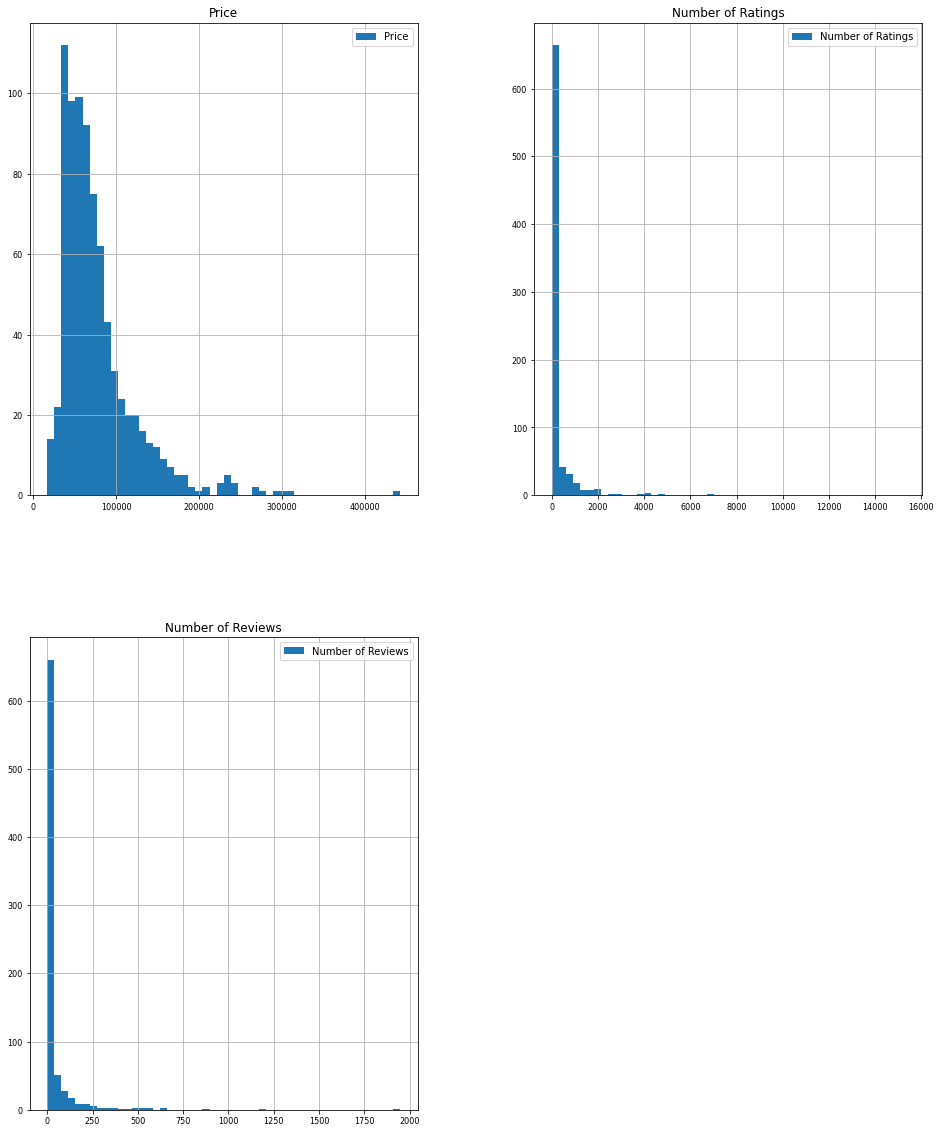

In [22]:
# Histograms 
df_num = df[['Price','Number of Ratings','Number of Reviews']]
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,legend='bool')

So, we can see some outliers here in both the three columns

<AxesSubplot:xlabel='brand', ylabel='Price'>

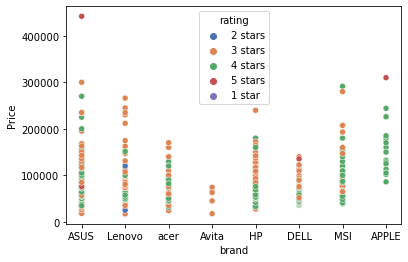

In [23]:
sns.scatterplot(data=df,x='brand',y='Price',hue='rating',palette='deep',sizes=(25,30))

In [24]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


<AxesSubplot:xlabel='brand', ylabel='Price'>

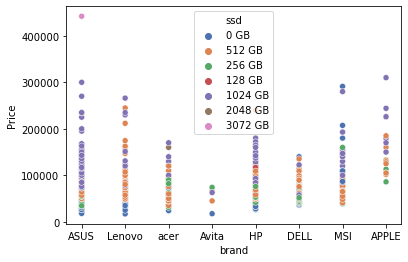

In [25]:
sns.scatterplot(data=df,x='brand',y='Price',hue='ssd',palette='deep',sizes=(25,30))

<AxesSubplot:xlabel='ram_gb', ylabel='Price'>

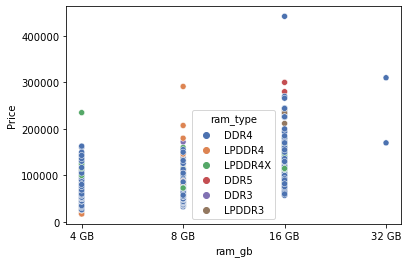

In [26]:
sns.scatterplot(data=df,x='ram_gb',y='Price',hue='ram_type',palette='deep',sizes=(25,30))


<AxesSubplot:xlabel='brand', ylabel='Number of Reviews'>

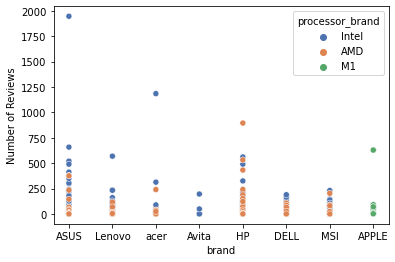

In [27]:
sns.scatterplot(data=df,x='brand',y='Number of Reviews',hue='processor_brand',palette='deep',sizes=(25,30))

<AxesSubplot:xlabel='brand', ylabel='Number of Ratings'>

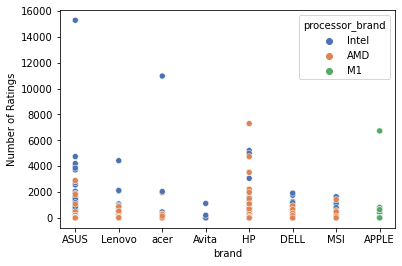

In [28]:
sns.scatterplot(data=df,x='brand',y='Number of Ratings',hue='processor_brand',palette='deep',sizes=(25,30))

So, from above all the scatter plots we can see outliers in all three continous columns 
and also the ditribution of different features with target can be seen

<AxesSubplot:xlabel='Price'>

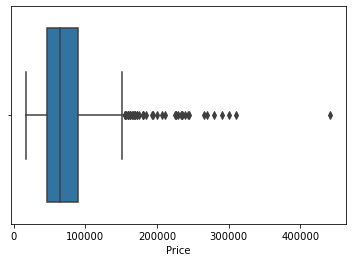

In [29]:
# Box Plot
sns.boxplot(data=df_num,x='Price')

<AxesSubplot:xlabel='Number of Ratings'>

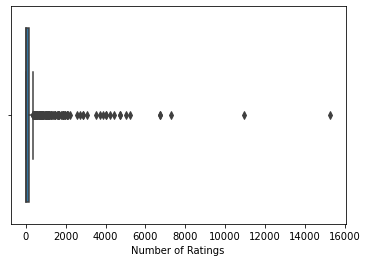

In [30]:
sns.boxplot(data=df,x='Number of Ratings')

<AxesSubplot:xlabel='Number of Reviews'>

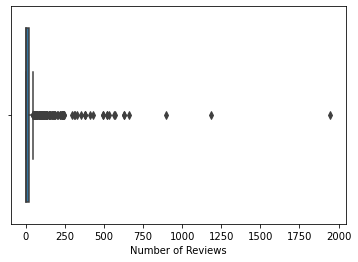

In [31]:
sns.boxplot(data=df,x='Number of Reviews')

Treatment of outliers

In [45]:
from scipy import stats
z_scores = stats.zscore(df_num)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df_num_z = df_num[filtered_entries]
new_df_num_z.shape

(768, 3)

In [46]:
percnt_rem_z=((len(df_num)-len(new_df_num_z))/len(df_num))*100
percnt_rem_z

4.239401496259352

In [47]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
filtered_entries = ~((df_num < (Q1 - 1.50 * IQR)) |(df_num > (Q3 + 1.50 * IQR))).any(axis=1)
new_df_num_iqr = df_num[filtered_entries]
new_df_num_iqr.shape

(619, 3)

In [48]:
percnt_rem_iqr=((len(df_num)-len(new_df_num_iqr))/len(df_num))*100
percnt_rem_iqr

22.81795511221945

In [49]:
df_num.shape

(802, 3)

So, we can see using IQR method removes 22.82% of the data , but Z score methods removes little more than 4.2% , as the datset is not larger I will consider the removal of outliers using Z score only

In [50]:
# Define the names of the three common columns
common_cols = ['Price', 'Number of Ratings', 'Number of Reviews']

# Merge the datasets based on the three common columns, keeping the index of the smaller dataset
merged_df = pd.merge(new_df_num_z, df.drop_duplicates(subset=common_cols),on=common_cols,how='inner')
# merged_df.set_index(smaller_df.index, inplace=True)

In [51]:
merged_df.shape

(768, 19)

In [52]:
merged_df.head()

,Price,Number of Ratings,Number of Reviews,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,34649,3,0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars
1,38999,65,5,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
2,39999,8,1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
3,69990,0,0,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars
4,26990,0,0,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars


Multivariate Analysis

In [54]:
# Pie Charts
merged_df['Price'].max()

211753

In [69]:
merged_df.groupby('Price')['brand'].max()

Price
16990     Lenovo
17490      Avita
17990       ASUS
18990       ASUS
20490       ASUS
           ...  
192990       MSI
194990      ASUS
199990      ASUS
207290       MSI
211753    Lenovo
Name: brand, Length: 388, dtype: object

In [62]:
df_asus=merged_df[merged_df['brand']=='ASUS']
df_asus['Price'].max()

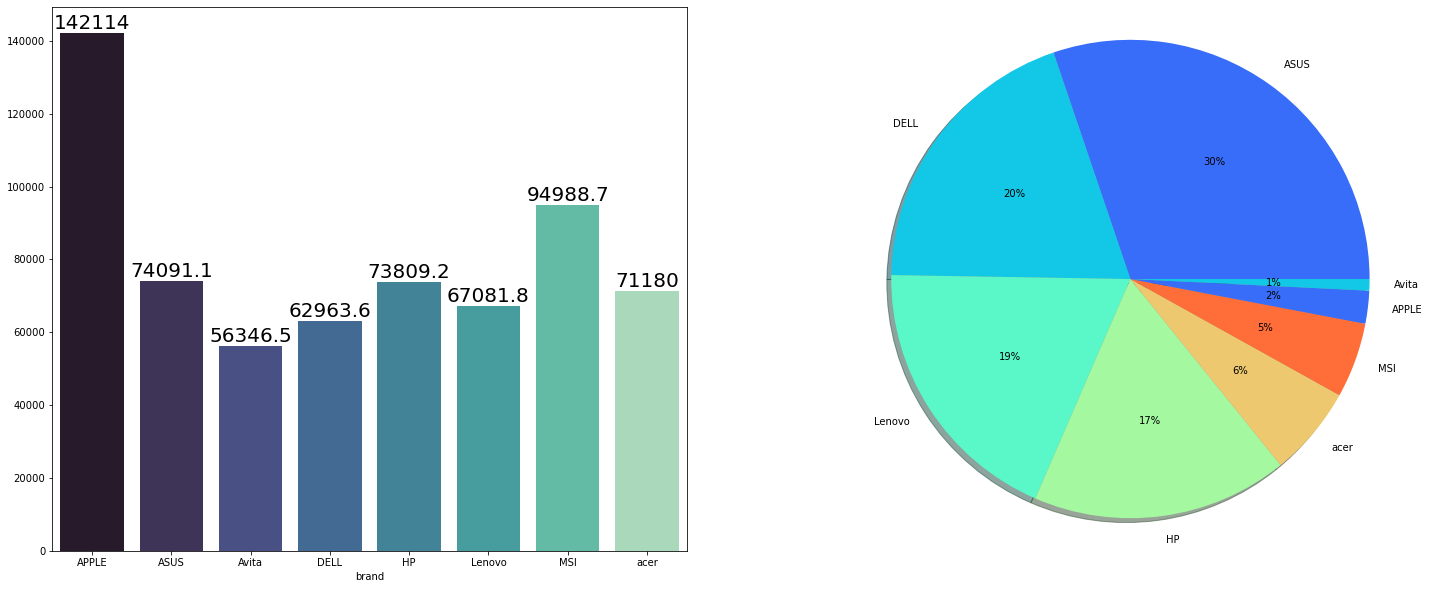

In [85]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = merged_df.groupby('brand')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
palette_color = sns.color_palette('rainbow')
plt.pie(x = merged_df['brand'].value_counts(),labels=merged_df['brand'].value_counts().index,autopct='%.0f%%',shadow=True,
        colors= palette_color,radius=1.1)
plt.show() 


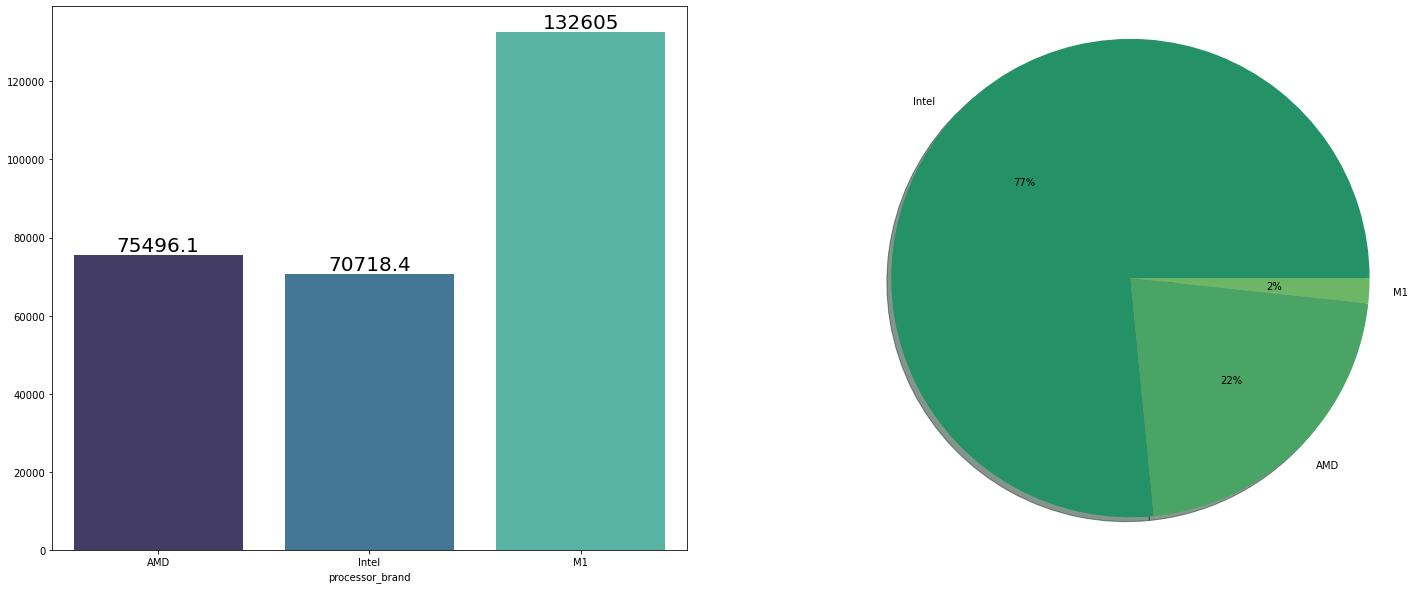

In [88]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = merged_df.groupby('processor_brand')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
palette_color = sns.color_palette('summer')
plt.pie(x = merged_df['processor_brand'].value_counts(),labels=merged_df['processor_brand'].value_counts().index,autopct='%.0f%%',shadow=True,
        colors= palette_color,radius=1.1)
plt.show() 


In [87]:
merged_df.head()

,Price,Number of Ratings,Number of Reviews,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,34649,3,0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,2 stars
1,38999,65,5,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
2,39999,8,1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars
3,69990,0,0,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,3 stars
4,26990,0,0,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,3 stars


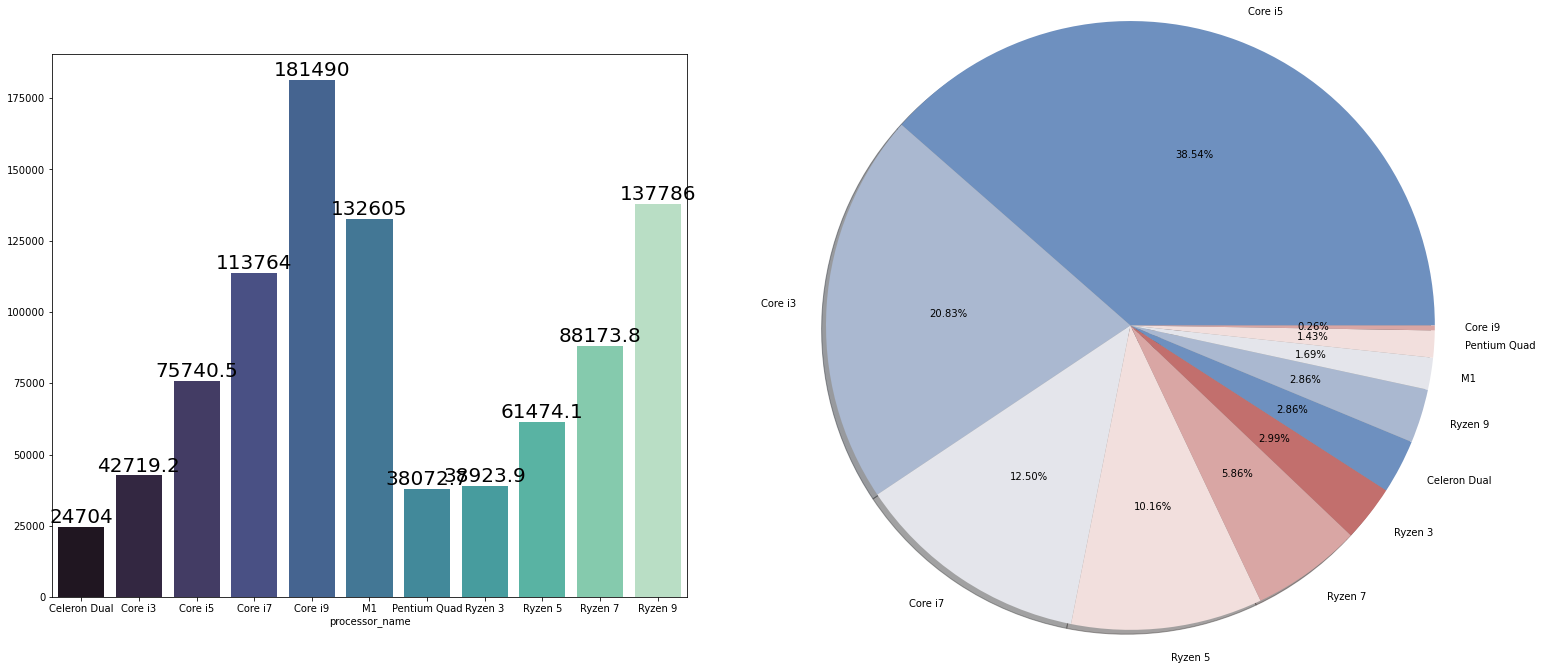

In [93]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = merged_df.groupby('processor_name')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
palette_color = sns.color_palette('vlag')
plt.pie(x = merged_df['processor_name'].value_counts(),labels=merged_df['processor_name'].value_counts().index,autopct='%.02f%%',shadow=True,
        colors= palette_color,radius=1.4)
plt.show() 


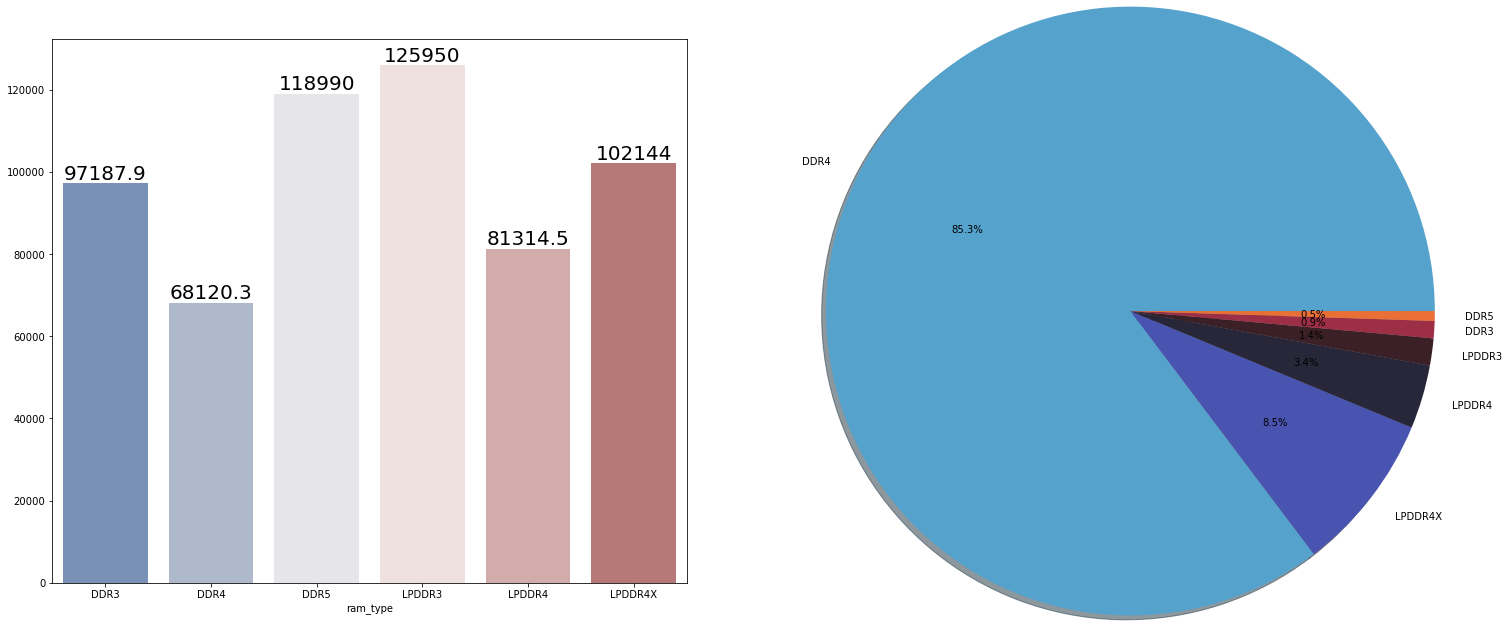

In [96]:
f,ax=plt.subplots(1,2,figsize=(25,10))
Group_data = merged_df.groupby('ram_type')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values,ax= ax[0],  palette = 'vlag')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
palette_color = sns.color_palette('icefire')
plt.pie(x = merged_df['ram_type'].value_counts(),labels=merged_df['ram_type'].value_counts().index,autopct='%.01f%%',shadow=True,
        colors= palette_color,radius=1.4)
plt.show() 


In [97]:
correlation=merged_df.corr()

In [99]:
correlation.head()

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.207644,-0.200824
Number of Ratings,-0.207644,1.000000,0.982810
Number of Reviews,-0.200824,0.982810,1.000000


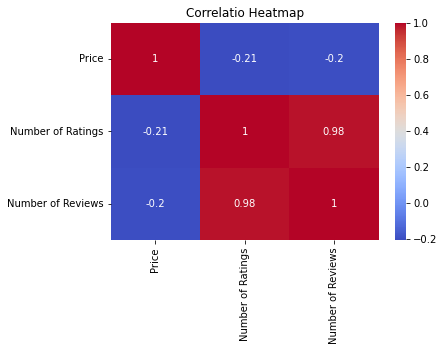

In [98]:
ax = sns.heatmap(correlation, annot=True, cmap='coolwarm')
ax.set_title('Correlatio Heatmap')
plt.show()

In [119]:
temp_dict = {}
for i in correlation.index:
    for j in correlation.columns:
        if (correlation.loc[i, j] > 0.75 and correlation.loc[i, j] < 1) or (correlation.loc[i, j] < -0.75):
            temp_dict[i] = j

In [120]:
temp_dict

{'Number of Ratings': 'Number of Reviews',
 'Number of Reviews': 'Number of Ratings'}


# Data Preprocessing 

Lebel Encoding

In [122]:
df_lencoded=merged_df

In [129]:
from sklearn import preprocessing as PPC
from sklearn.preprocessing import LabelEncoder

# # define the columns to encode
# col = ['job', 'marital', 'education','default','housing','loan','contact','month','poutcome','target']

# # create a LabelEncoder object
le = LabelEncoder()

# # loop through each column and encode the values
for col in cat_col:
    df_lencoded[col] = le.fit_transform(df_lencoded[col])

In [128]:
df_lencoded.head()

,Price,Number of Ratings,Number of Reviews,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,34649,3,0,1,1,1,0,2,1,0,1,2,1,0,0,3,0,0,1
1,38999,65,5,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,2
2,39999,8,1,5,1,1,0,2,1,0,1,2,1,0,0,3,0,0,2
3,69990,0,0,1,1,2,0,3,1,5,0,2,0,1,0,3,0,0,2
4,26990,0,0,1,1,0,7,2,1,0,3,2,1,0,0,3,0,0,2


MinMax Scaling 

In [130]:
scaler = PPC.MinMaxScaler(feature_range=(0, 1))

features_scaled = scaler.fit_transform(df_lencoded)

In [134]:
df1=pd.DataFrame(features_scaled,columns=df_lencoded.columns)

In [135]:
df1.head()

,Price,Number of Ratings,Number of Reviews,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,rating
0,0.090669,0.000980,0.000000,0.142857,0.5,0.1,0.0,0.666667,0.2,0.0,0.333333,1.0,1.0,0.00,0.0,1.0,0.0,0.0,0.25
1,0.113004,0.021228,0.013333,0.714286,0.5,0.1,0.0,0.666667,0.2,0.0,0.333333,1.0,1.0,0.00,0.0,1.0,0.0,0.0,0.50
2,0.118138,0.002613,0.002667,0.714286,0.5,0.1,0.0,0.666667,0.2,0.0,0.333333,1.0,1.0,0.00,0.0,1.0,0.0,0.0,0.50
3,0.272126,0.000000,0.000000,0.142857,0.5,0.2,0.0,1.000000,0.2,1.0,0.000000,1.0,0.0,0.25,0.0,1.0,0.0,0.0,0.50
4,0.051344,0.000000,0.000000,0.142857,0.5,0.0,1.0,0.666667,0.2,0.0,1.000000,1.0,1.0,0.00,0.0,1.0,0.0,0.0,0.50


In [136]:
df1.shape

(768, 19)

Train Test Split

In [137]:
X = df1.drop('Price',axis=1)
y = df1['Price']

In [173]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
X_train.shape

(614, 18)

In [175]:
X_test.shape

(154, 18)

In [176]:
y_train.shape

(614,)

In [177]:
# compare machine learning algorithms on the  dataset
from pycaret.regression import setup
from pycaret.regression import compare_models
grid = setup(data=X_train, target=y_train, html=False, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

                                    Model     MAE     MSE    RMSE      R2  \
gbr           Gradient Boosting Regressor  0.0473  0.0053  0.0716  0.8147   
xgboost         Extreme Gradient Boosting  0.0456  0.0055  0.0727  0.8092   
rf                Random Forest Regressor  0.0469  0.0060  0.0762  0.7941   
et                  Extra Trees Regressor  0.0509  0.0068  0.0814  0.7607   
lightgbm  Light Gradient Boosting Machine  0.0583  0.0084  0.0902  0.7067   
dt                Decision Tree Regressor  0.0596  0.0098  0.0982  0.6455   
ridge                    Ridge Regression  0.0759  0.0126  0.1106  0.5628   
br                         Bayesian Ridge  0.0756  0.0126  0.1107  0.5615   
huber                     Huber Regressor  0.0714  0.0130  0.1119  0.5582   
lar                Least Angle Regression  0.0757  0.0127  0.1114  0.5568   
lr                      Linear Regression  0.0757  0.0127  0.1114  0.5568   
ada                    AdaBoost Regressor  0.1000  0.0141  0.1183  0.4936   

Base Models Building

In [186]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [209]:
dt = DecisionTreeRegressor(max_depth=5)
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(n_estimators=100,random_state=42)
et = ExtraTreesRegressor(n_estimators=100,random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100,random_state=42)
xgb = XGBRegressor(n_estimators=100,random_state=42)



In [212]:
# Decision Tree
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Calculate R-squared score
r2_dt = r2_score(y_test, y_pred)

print("R-squared score:", r2_dt)



R-squared score: 0.6095039614663712


In [213]:
#KNN 
knn.fit(X_train, y_train)
# Predict on test data
y_pred = knn.predict(X_test)
r2_knn= r2_score(y_test,y_pred)
print('R-square score:' ,r2_knn)

R-square score: 0.624386415426839


In [214]:
# Random Forest 
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2_rf= r2_score(y_test, y_pred)
print('R-squared score:' ,r2_rf)

R-squared score: 0.8262298101650916


In [215]:
# ExtraTrees
et.fit(X_train,y_train)
y_pred = et.predict(X_test)
r2_et= r2_score(y_test, y_pred)
print('R-squared score:' ,r2_et)


R-squared score: 0.8245265705323866


In [216]:
# Gradient Boosting
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
r2_gbm= r2_score(y_test, y_pred)
print('R-squared score:' ,r2_gbm)

R-squared score: 0.7733492896445587


In [217]:
# XG Boost
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_xgb= r2_score(y_test, y_pred)
print('R-squared score:' ,r2_xgb)

R-squared score: 0.8267585797369597


Base Model Comparison

In [231]:
compare = pd.DataFrame({'Model': ['Decision Tree','KNeighbors', 'Random Forest','Extra Trees', "Gradient Boosting",
                                  "XG Boot"], 
                        'r2_Score': [r2_dt, r2_knn, r2_rf,r2_et, r2_gbm,r2_xgb]})
compare.sort_values(by='r2_Score', ascending=True)

,Model,r2_Score
0,Decision Tree,0.609504
1,KNeighbors,0.624386
4,Gradient Boosting,0.773349
3,Extra Trees,0.824527
2,Random Forest,0.826230
5,XG Boot,0.826759


Hyperparameter Tunning and Building Optomized Models

In [222]:
# Decision Tree 
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, n_jobs = -1, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [223]:
dt_best

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=10,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

In [226]:
y_pred = dt_best.predict(X_test)

O_r2_dt = r2_score(y_test, y_pred)
print('Optimized DT R-squared Score: ',O_r2_dt)

Optimized DT R-squared Score:  0.5900829261783236


In [228]:
# Random Forest 
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs = -1, cv=5,verbose=True)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [229]:
rf_best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [232]:
y_pred = rf_best.predict(X_test)

O_r2_rf = r2_score(y_test, y_pred)
print('Optimized DT R-squared Score: ',O_r2_rf)

Optimized DT R-squared Score:  0.8075251722097967
